# Applying Artificial Neural Networks to Avila Dataset

# Data used here

Here, I use the data **Avila** from UCI: https://archive.ics.uci.edu/ml/datasets/Avila#. The Avila data set has been extracted from 800 images of the 'Avila Bible', an XII century giant Latin copy of the Bible. The prediction task consists in associating each pattern to a copyist.

### Data Set Information:

CLASS DISTRIBUTION (training set)

A: 4286 

B: 5 

C: 103 

D: 352 

E: 1095 

F: 1961 

G: 446 

H: 519 

I: 831 

W: 44 

X: 522 

Y: 266

### Attribute Information:

F1: intercolumnar distance 

F2: upper margin 

F3: lower margin 

F4: exploitation 

F5: row number 

F6: modular ratio 

F7: interlinear spacing 

F8: weight 

F9: peak number 

F10: modular ratio/ interlinear spacing 

Class: A, B, C, D, E, F, G, H, I, W, X, Y

### Relevant Papers:

C. DeÂ Stefano, M. Maniaci, F. Fontanella, A. ScottoÂ diÂ Freca, 
Reliable writer identification in medieval manuscripts through page layout features: The 'Avila' Bible case, Engineering Applications of Artificial Intelligence, Volume 72, 2018, pp. 99-110. 

C. De Stefano, F. Fontanella, M. Maniaci and A. Scotto di Freca, 'A Method for Scribe Distinction in Medieval Manuscripts Using Page Layout Features', Lecture Notes in Computer Science, G. Maino and G. Foresti (eds.), Springer-Verlag, vol. 6978, pp. 393-402.

## Import modules

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings("ignore")

# Data Preperation

In [5]:
# Load the data and show the basic information
data=pd.read_csv("Data/avila-tr.csv")
print('Data size: (%.f, %.f)\n' % data.shape)
data.head()

Data size: (10430, 11)



,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,Class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


# Multi-layer Perceptron Model
We will use the multi-layer percepton to understand the basic usage of artificial neural network models. 

## Basic use of the Model

In [6]:
# Specifying features and the target
X = data.drop(['Class'], axis = 'columns')
y = data['Class']

# Spliting the dataset into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Training the MLPClassifier with the default parameters (random_state=42)
clf = MLPClassifier(random_state=42)
clf.fit(X_train, y_train)

# Get Output of the accuracy on training data and test data respectively
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.4f \n' % accuracy)

Accuracy: 0.7584 



In [7]:
# Exploring the learned MLP model
print(clf)
print('\n# of layers (including the input layer): %.f\n' % clf.n_layers_)
print('MLP structure: %.f X %.f X %.f\n' % (X.shape[1], clf.get_params()['hidden_layer_sizes'][0], clf.n_outputs_))

MLPClassifier(random_state=42)

# of layers (including the input layer): 3

MLP structure: 10 X 100 X 12



## Using 10-fold Cross Validation to Report a more Robust Testing Performance

In [8]:
# Useing 10-fold cross validation to validate the model
clf = MLPClassifier(random_state=42)
scores_mlp_default = cross_val_score(clf, X, y, cv=10, verbose=1)
print('Accuracy range for Multi-layer Perceptron: [%.4f, %.4f]; mean: %.4f; std: %.4f\n'
      % (scores_mlp_default.min(), scores_mlp_default.max(), scores_mlp_default.mean(), scores_mlp_default.std()))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy range for Multi-layer Perceptron: [0.7574, 0.7862]; mean: 0.7743; std: 0.0082



[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.3min finished


## Increasing the number of hidden units
Here, I draw a figure to report the testing accuray with differnt number of hidden units [10,20,30,40,50,60,70,80,90,100]. The parameter 'hidden_layer_sizes' accepts a list of numbers specifying the number of units in each hidden layer. I plot the relationship between the parameter and the accuracy score.

In [9]:
# For each number of hidden units, we use 10-fold cross validation to report the testing accuracy.
cv_scores = []
cv_scores_std = []
hidden_unit_numbers = [[10],[20],[30],[40],[50],[60],[70],[80],[90],[100]]
for i in hidden_unit_numbers:
    clf_mlp = MLPClassifier(hidden_layer_sizes=i, random_state=42)
    scores = cross_val_score(clf_mlp, X, y, scoring='accuracy', cv=10, verbose=1)
    cv_scores.append(scores.mean())
    cv_scores_std.append(scores.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   48.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

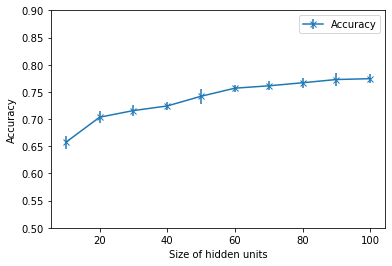

In [10]:
# Ploting the relationship
plt.errorbar(hidden_unit_numbers, cv_scores, yerr=cv_scores_std, marker='x', label='Accuracy')
plt.xlabel('Size of hidden units')
plt.ylim(0.5, 0.9)
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

**It can be seen that the accuracy increases when the number of units in the hidden layer increases. The reason is the a model with a bigger number of hiden layer units has a higher complexity to capture the information in data.**

## Determining the Number of hidder layers

In [29]:
# Trying a MLP model with two hidden layers
clf = MLPClassifier(hidden_layer_sizes=[100, 100], random_state=42)
scores_mlp_2layer = cross_val_score(clf_mlp, X, y, scoring='accuracy', cv=10, verbose=1)
print('Accuracy range for Multi-layer Perceptron: [%.4f, %.4f]; mean: %.4f; std: %.4f\n'
      % (scores_mlp_2layer.min(), scores_mlp_2layer.max(), scores_mlp_2layer.mean(), scores_mlp_2layer.std()))

t, p = ttest_ind(scores_mlp_2layer, scores_mlp_2layer)
print ('t, p: %.4f, %.6f\n' % (t,p))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy range for Multi-layer Perceptron: [0.8226, 0.8639]; mean: 0.8470; std: 0.0122

t, p: 0.0000, 1.000000



[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  7.8min finished


In [13]:
# Trying different activation functions
cv_scores = []
cv_scores_std = []
solvers = ['lbgfgs', 'sgd', 'adam']
for i in solvers:
    clf_mlp = MLPClassifier(solver=i, random_state=42)
    scores = cross_val_score(clf_mlp, X, y, scoring='accuracy', cv=10)
    cv_scores.append(scores.mean())
    cv_scores_std.append(scores.std())

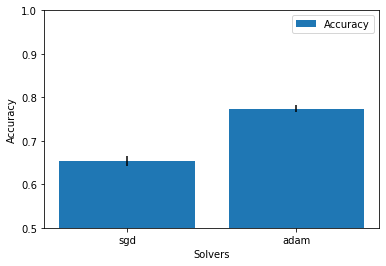

In [14]:
plt.bar(solvers, cv_scores, yerr=cv_scores_std, label='Accuracy')
plt.xlabel('Solvers')
plt.ylim([0.5, 1])
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

## Choosing solver for the learning process
I used gradient descent methods (standard gradient and stochastic gradient descent) to learn weights for the error minimization problem. Moreover, other solvers can be used for the optimization problem. Here, I draw a figure to report the accuracy with differnt solvers.

In [15]:
# Trying different solvers
cv_scores = []
cv_scores_std = []
solvers = ['lbfgs', 'sgd', 'adam']
for i in solvers:
    clf_mlp = MLPClassifier(solver=i, random_state=42)
    scores = cross_val_score(clf_mlp, X, y, scoring='accuracy', cv=10)
    cv_scores.append(scores.mean())
    cv_scores_std.append(scores.std())

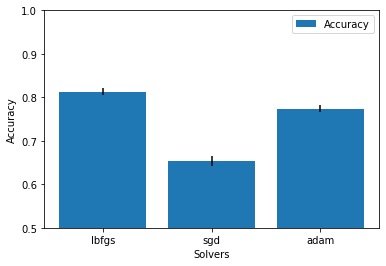

In [16]:
# Ploting the relationship
plt.bar(solvers, cv_scores, yerr=cv_scores_std, label='Accuracy')
plt.xlabel('Solvers')
plt.ylim([0.5, 1])
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

**It can be seen that sgd doesn't perform as well as the other two solvers**

## Choosing Activation functions
Tried the possible activation functions 'identity’, ‘logistic’, ‘tanh’, and ‘relu’ provided by the API. And drew a figure to report the accuracy with different activation functions.

In [17]:
# Trying different activation functions
cv_scores = []
cv_scores_std = []
funtions = ['identity', 'logistic', 'tanh', 'relu']
for i in funtions:
    clf_mlp = MLPClassifier(activation = i, random_state =42)
    scores = cross_val_score(clf_mlp,X,y,scoring='accuracy', cv=10)
    cv_scores.append(scores.mean())
    cv_scores_std.append(scores.std())

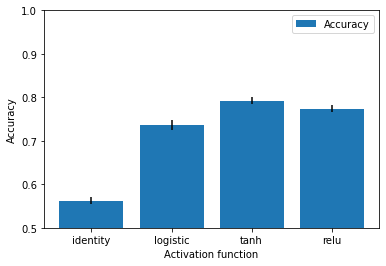

In [21]:
# Ploting the relationship
plt.bar(funtions, cv_scores, yerr=cv_scores_std, label='Accuracy')
plt.xlabel('Activation function')
plt.ylim([0.5, 1])
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

## Using different values of alpha
The parameter alpha is the L2 penalty to overcome the overfitting issue. It balances the error caused the data and that by the model structure (number of weights). 
Here, I draw a figure to report the accuracy with different values of alpha [0.0001,0.001,0.01, 0.1,1].

In [22]:
# Trying different regulaization parameters
cv_scores = []
cv_scores_std = []
alphas = [0.0001,0.001,0.01, 0.1,1]
for i in alphas:
    clf_mlp = MLPClassifier(alpha=i, random_state=42)
    scores = cross_val_score(clf_mlp, X, y, scoring='accuracy', cv=10)
    cv_scores.append(scores.mean())
    cv_scores_std.append(scores.std())

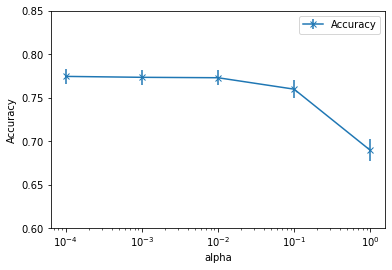

In [23]:
# Ploting the relationship
plt.errorbar(alphas, cv_scores, yerr=cv_scores_std, marker='x', label='Accuracy')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylim([0.6, 0.85])
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

**It can be seen that when alpha increases, the prediction accuracy drops, showing that the overfitting issue of the model on this dataset is not a big problem.**

### Increasing the number of iterations
Explored when it is good enough to stop the iteration of weight updating. And drew a figure to report the accuray with differnt number of iterations [200,400,600,800,1000].

In [24]:
# Trying different number of iterations.
cv_scores = []
cv_scores_std = []
interation_numbers = [200, 400, 600, 800, 1000]
for i in interation_numbers:
    clf_mlp = MLPClassifier(max_iter=i, random_state=42)
    scores = cross_val_score(clf_mlp, X, y, scoring='accuracy', cv=10, verbose=1)
    cv_scores.append(scores.mean())
    cv_scores_std.append(scores.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  5.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  6.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  9.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 10.4min finished


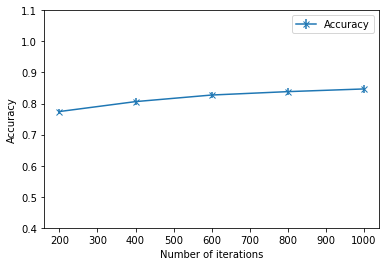

In [28]:
# Ploting the relationship
plt.errorbar(interation_numbers, cv_scores, yerr=cv_scores_std, marker='x', label='Accuracy')
plt.ylim([0.4, 1.1])
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

**Accuracy is increasing with higher number of iterations. Taking into account the large computational time, above 800 interations should be sufficient.**